In [ ]:
pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 5.2 MB/s eta 0:00:00


In [ ]:
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 47.8 MB/s eta 0:00:00


In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import random

In [ ]:
n = 10
alice_bits = [random.randint(0, 1) for _ in range(n)]
alice_bases = [random.randint(0, 1) for _ in range(n)]

In [ ]:
qc = QuantumCircuit(n, n)

In [ ]:
for i in range(n):
    if alice_bits[i] == 1:
        qc.x(i)  # Apply X if Alice's bit is 1
    if alice_bases[i] == 1:
        qc.h(i)  # Apply Hadamard if Alice's basis is 1

In [ ]:
qc.draw()

┌───┐
 q_0: ┤ X ├
      └───┘
 q_1: ─────
      ┌───┐
 q_2: ┤ H ├
      ├───┤
 q_3: ┤ H ├
      ├───┤
 q_4: ┤ H ├
      ├───┤
 q_5: ┤ X ├
      ├───┤
 q_6: ┤ H ├
      └───┘
 q_7: ─────
      ┌───┐
 q_8: ┤ X ├
      ├───┤
 q_9: ┤ H ├
      └───┘
c: 10/═════

In [ ]:
bob_bases = [random.randint(0, 1) for _ in range(n)]

In [ ]:
for i in range(n):
    if bob_bases[i] == 1:
        qc.h(i)  # Apply Hadamard if Bob's basis is Hadamard
    qc.measure(i, i)

In [ ]:
qc.draw()

┌───┐     ┌─┐                        
 q_0: ┤ X ├─────┤M├────────────────────────
      ├───┤     └╥┘┌─┐                     
 q_1: ┤ H ├──────╫─┤M├─────────────────────
      ├───┤      ║ └╥┘┌─┐                  
 q_2: ┤ H ├──────╫──╫─┤M├──────────────────
      ├───┤      ║  ║ └╥┘┌─┐               
 q_3: ┤ H ├──────╫──╫──╫─┤M├───────────────
      ├───┤      ║  ║  ║ └╥┘┌─┐            
 q_4: ┤ H ├──────╫──╫──╫──╫─┤M├────────────
      ├───┤┌───┐ ║  ║  ║  ║ └╥┘      ┌─┐   
 q_5: ┤ X ├┤ H ├─╫──╫──╫──╫──╫───────┤M├───
      ├───┤├───┤ ║  ║  ║  ║  ║       └╥┘┌─┐
 q_6: ┤ H ├┤ H ├─╫──╫──╫──╫──╫────────╫─┤M├
      └───┘└┬─┬┘ ║  ║  ║  ║  ║        ║ └╥┘
 q_7: ──────┤M├──╫──╫──╫──╫──╫────────╫──╫─
      ┌───┐ └╥┘  ║  ║  ║  ║  ║ ┌─┐    ║  ║ 
 q_8: ┤ X ├──╫───╫──╫──╫──╫──╫─┤M├────╫──╫─
      ├───┤  ║   ║  ║  ║  ║  ║ └╥┘┌─┐ ║  ║ 
 q_9: ┤ H ├──╫───╫──╫──╫──╫──╫──╫─┤M├─╫──╫─
      └───┘  ║   ║  ║  ║  ║  ║  ║ └╥┘ ║  ║ 
c: 10/═══════╩═══╩══╩══╩══╩══╩══╩══╩══╩══╩═
             7   0  1  2  3  4  8  9  5  6

In [ ]:
simulator = AerSimulator()
result = simulator.run(qc, shots=1).result()
bob_measurements = list(result.get_counts(qc).keys())[0]

In [ ]:
sifted_key = []

In [ ]:
for i in range(n):
    if alice_bases[i] == bob_bases[i]:
        sifted_key.append(int(bob_measurements[i]))

In [ ]:
print("Sifted Key:", sifted_key)

Sifted Key: [0, 1, 0, 0]


In [ ]:
assert len(sifted_key) <= n, "Sifted key should be no longer than the initial bit sequence"

In [ ]:
for i in range(n):
    if alice_bases[i] == bob_bases[i]:
        assert int(bob_measurements[i]) == sifted_key.pop(0), "Mismatch in sifted key bit from measurement"

print("All tests passed. Sifted key generation verified.")

All tests passed. Sifted key generation verified.


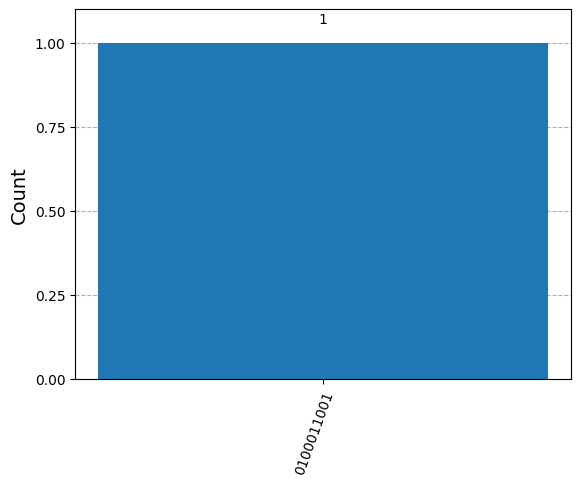

In [ ]:
plot_histogram(result.get_counts(qc))